<a href="https://colab.research.google.com/github/kavehkarimadini/ARC_101_Machine_Learning/blob/main/Support_Vector_Machines(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Building Blocks of Support Vector Machines (SVM)**

Before diving into Support Vector Machines, let’s first understand the fundamental concepts of **margin** and **geometric margin** for a classifier.

---

## **1. Function Margin & Geometric Margin**

A classifier’s margin measures how well it separates different classes. There are two types of margins we need to discuss:

### **1.1. Functional Margin**
The functional margin of a classifier measures how confident the classifier is in its predictions.

For a dataset with input-output pairs $(x_i, y_i)$, where $ x_i \in \mathbb{R}^n $ and $ y_i \in \{-1, +1\} $, a linear classifier is defined by:

$
f(x) = w^T x + b
$

The **functional margin** for a data point $ (x_i, y_i) $ is:

$
\gamma_i = y_i (w^T x_i + b)
$

- If $ \gamma_i > 0 $, the prediction is correct.
- If $ \gamma_i < 0 $, the prediction is incorrect.
- The **larger** the value, the more confident the prediction.

For the entire dataset, the **functional margin of the classifier** is:

$
\gamma = \min_{i} y_i (w^T x_i + b)
$

This means the functional margin is determined by the smallest margin over all training points (i.e., the weakest classified point).

---

### **1.2. Geometric Margin**
The **geometric margin** is a more robust way of measuring how well the classifier separates the data. It is the **perpendicular distance** from a data point $ x_i $ to the decision boundary.

#### **Why do we need geometric margin?**
The functional margin depends on $ w $, and if we scale $ w $ and $ b $ by a factor $ c $, the functional margin scales accordingly:

$
\gamma_i = y_i (c w^T x_i + c b) = c \cdot y_i (w^T x_i + b)
$

This means the functional margin can be arbitrarily large or small depending on $ c $, which is not ideal for optimization.

To fix this, we use the **geometric margin**, which is independent of scaling.

The **geometric margin** for a point $ (x_i, y_i) $ is:

$
\hat{\gamma}_i = \frac{y_i (w^T x_i + b)}{\|w\|}
$

This measures the perpendicular distance from the point to the decision boundary, normalized by the magnitude of $ w $, making it scale-invariant.

For the dataset, the **geometric margin of the classifier** is:

$
\hat{\gamma} = \min_{i} \frac{y_i (w^T x_i + b)}{\|w\|}
$

---

## **2. Relationship Between Functional and Geometric Margin**
The functional and geometric margins are related as:

$
\gamma_i = \|w\| \hat{\gamma}_i
$

This means that **maximizing the geometric margin** is equivalent to **maximizing the functional margin while keeping $ \|w\| $ fixed**.

---

## **3. The Optimal Margin Classifier (Maximizing Geometric Margin)**
The goal of **Support Vector Machines (SVMs)** is to find the **optimal margin classifier**, which is the linear classifier that **maximizes the geometric margin**.

### **Mathematical Formulation**
To maximize the geometric margin, we solve the following optimization problem:

$
\max_{\gamma, w, b} \quad \gamma
$

subject to:

$
y_i (w^T x_i + b) \geq \gamma, \quad \forall i
$

To simplify, we set the functional margin of the closest points to **1**:

$
y_i (w^T x_i + b) \geq 1, \quad \forall i
$

Now, maximizing the geometric margin simplifies to **minimizing $ \|w\| $**:

$
\min_{w, b} \quad \frac{1}{2} \|w\|^2
$

subject to:

$
y_i (w^T x_i + b) \geq 1, \quad \forall i
$

This is the **primal optimization problem** for SVM.

---

### **4. Interpretation of the Optimal Margin Classifier**
- **The decision boundary is as far as possible from the closest points (support vectors)**.
- **The classifier is more robust to noise**, as small perturbations in data points are less likely to cause misclassification.
- **Only the support vectors matter**—the rest of the data does not influence the decision boundary.

---

### **5. Summary**
1. **Functional Margin** ($\gamma$) measures classification confidence but is sensitive to scaling.
2. **Geometric Margin** ($\hat{\gamma}$) is the perpendicular distance to the decision boundary and is scale-invariant.
3. **Maximizing the geometric margin** leads to the **optimal margin classifier**, which is the foundation of Support Vector Machines (SVMs).
4. **SVMs aim to find the hyperplane that maximizes the geometric margin**, leading to better generalization.

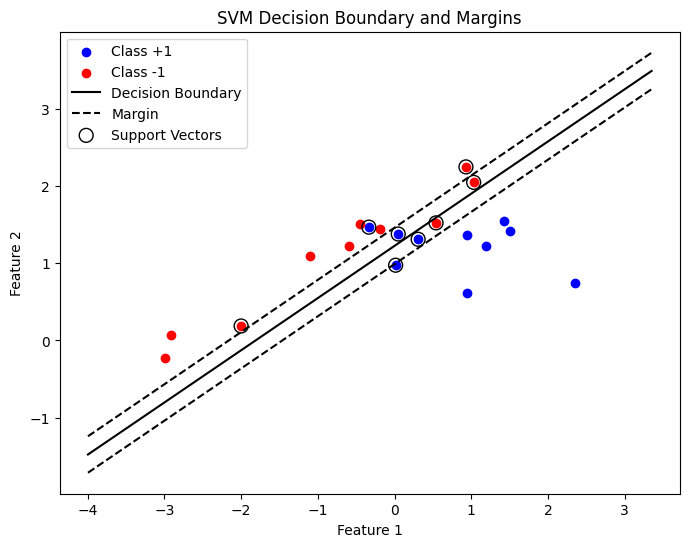

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Step 1: Generate a synthetic dataset
X, y = make_classification(n_samples=20, n_features=2, n_classes=2, n_clusters_per_class=1,
                           n_redundant=0, random_state=42)
y = 2*y - 1  # Convert labels from {0,1} to {-1,+1} for SVM

# Step 2: Train an SVM model
svm = SVC(kernel='linear', C=1e6)  # Large C for hard-margin SVM
svm.fit(X, y)

# Get model parameters
w = svm.coef_[0]  # Normal vector to the hyperplane
b = svm.intercept_[0]

# Compute decision boundary
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
y_vals = -(w[0] * x_vals + b) / w[1]  # Decision boundary

# Compute margins
margin = 1 / np.linalg.norm(w)
y_vals_margin_pos = y_vals + margin * (w[1] / np.linalg.norm(w))
y_vals_margin_neg = y_vals - margin * (w[1] / np.linalg.norm(w))

# Step 3: Plot the data and classifier margins
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class +1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')

# Plot decision boundary and margins
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')
plt.plot(x_vals, y_vals_margin_pos, 'k--', label='Margin')
plt.plot(x_vals, y_vals_margin_neg, 'k--')

# Highlight support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary and Margins')
plt.show()

### **The Kernel Trick in SVM**  

So far, we've discussed **linear SVM**, which finds a straight-line (or hyperplane in higher dimensions) decision boundary that maximizes the margin between classes. But what if the data is **not linearly separable**?  

This is where the **kernel trick** comes in! 🚀  

---

## **1. Why Do We Need the Kernel Trick?**
Consider the following cases where linear SVM **fails**:
- Data that is **curved** (e.g., concentric circles).
- Data with **complex decision boundaries**.

A linear SVM cannot separate such data efficiently. Instead of manually engineering new features, we use **kernel functions** to implicitly transform the data into a higher-dimensional space where a **linear separator exists**.

---

## **2. The Idea Behind the Kernel Trick**
Instead of transforming the data **explicitly** into a higher-dimensional space (which can be computationally expensive), the **kernel trick** computes the **dot product in that high-dimensional space directly, without explicitly transforming the data**.

This allows SVMs to operate efficiently in **infinite-dimensional feature spaces** without directly computing the transformation.

The key idea is:
$
\Phi(x) \text{ (explicit transformation)} \quad \text{vs.} \quad K(x, x') = \Phi(x)^T \Phi(x') \text{ (kernel trick)}
$
where:
- $ \Phi(x) $ maps the data into a higher-dimensional space.
- $ K(x, x') $ computes the dot product in that space **without needing to compute $ \Phi(x) $ explicitly**.

---

## **3. Common Kernel Functions**
Here are some popular kernels used in SVM:

### **3.1. Linear Kernel**
This is just the standard dot product:
$
K(x, x') = x^T x'
$
- Equivalent to a linear SVM.
- Used when data is **already linearly separable**.

### **3.2. Polynomial Kernel**
$
K(x, x') = (x^T x' + c)^d
$
- Maps the data into a higher-degree polynomial space.
- Useful when the decision boundary is **a polynomial curve**.
- $ d $ controls the degree of the polynomial.

### **3.3. Radial Basis Function (RBF) Kernel (Gaussian Kernel)**
$
K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)
$
- Maps data into an **infinite-dimensional space**.
- Works well for **highly complex decision boundaries**.
- $ \sigma $ (or equivalently, **gamma $ \gamma $** in SVM implementations) controls the influence of a single data point.
  - **High $ \gamma $**: Each point has a small influence (can lead to overfitting).
  - **Low $ \gamma $**: Points have a larger influence, making the decision boundary smoother.

### **3.4. Sigmoid Kernel**
$
K(x, x') = \tanh(\alpha x^T x' + c)
$
- Inspired by **neural networks** (acts like an artificial neuron).
- Less commonly used than RBF or polynomial.

---

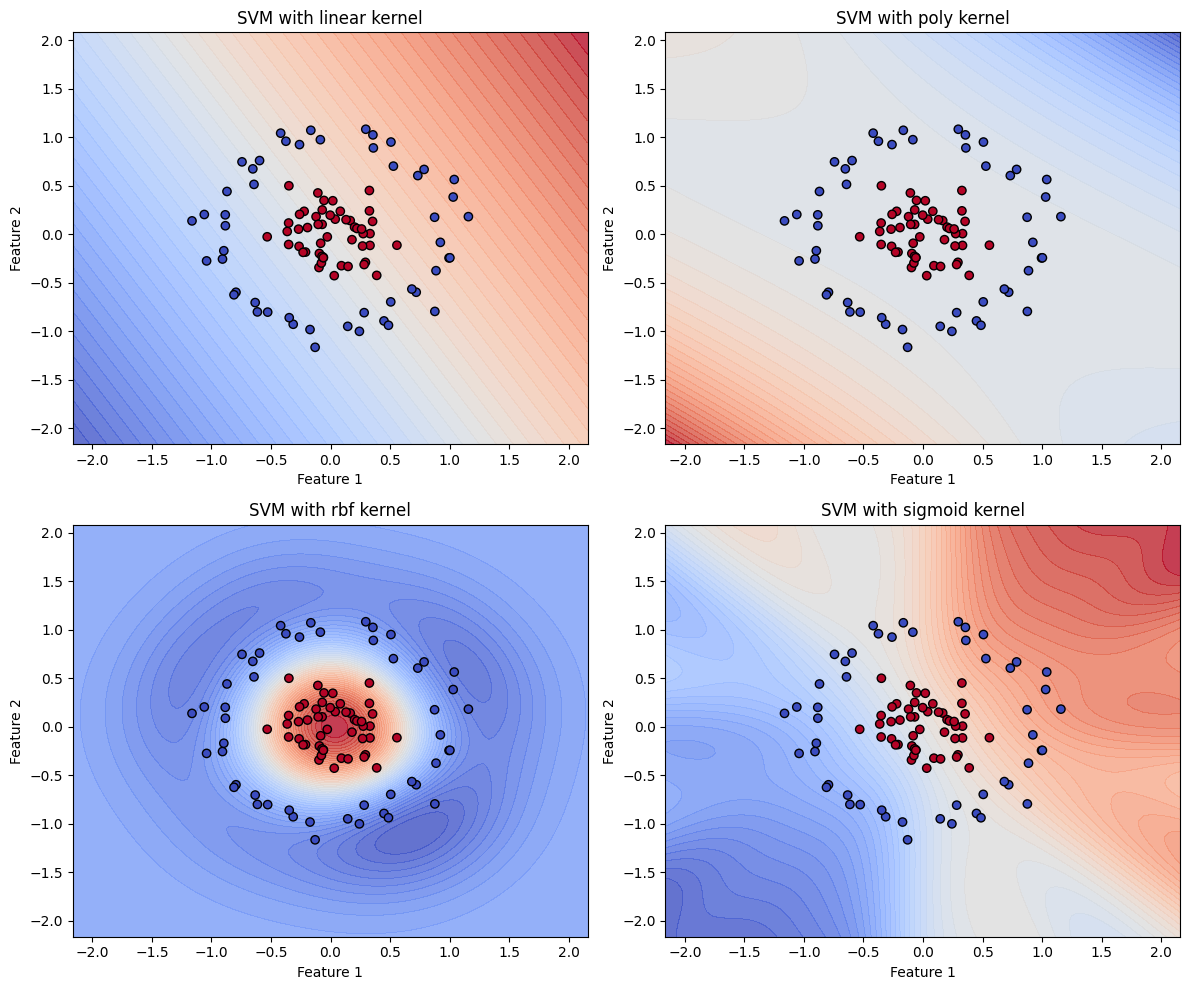

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Step 1: Generate non-linearly separable data
X, y = make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)

# Convert labels from {0,1} to {-1,+1} for SVM
y = 2*y - 1

# Step 2: Train SVM with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = [SVC(kernel=k, C=1) for k in kernels]
for model in models:
    model.fit(X, y)

# Step 3: Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

for ax, model, kernel in zip(axes, models, kernels):
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_title(f'SVM with {kernel} kernel')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


## Let's visualize how **non-linearly separable data in 2D** can be **transformed into a higher-dimensional (3D) space** where it becomes linearly separable.

### **Concept**
- In 2D, some datasets (e.g., concentric circles) **cannot be separated with a straight line**.
- By **mapping** the 2D data into **a higher-dimensional space (3D)** using a transformation function $ \Phi(x) $, we can make the data linearly separable.
- Example transformation:
$
  \Phi(x_1, x_2) = (x_1, x_2, x_1^2 + x_2^2)
  $
  - The third dimension is based on the **radial distance** $ x_1^2 + x_2^2 $, which lifts the points so they can be separated by a **hyperplane**.

---

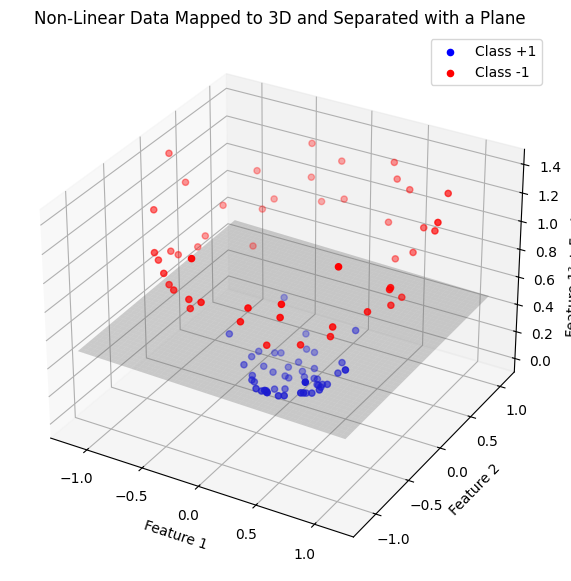

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_moons, make_circles
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate non-linearly separable 2D data
X, y = make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)

# Convert labels from {0,1} to {-1,+1} for SVM
y = 2*y - 1

# Step 2: Transform data to 3D using a non-linear mapping
X_3D = np.c_[X, X[:, 0]**2 + X[:, 1]**2]  # (x1, x2, x1^2 + x2^2)

# Step 3: Train an SVM in the transformed space
svm = SVC(kernel='linear', C=1)
svm.fit(X_3D, y)

# Step 4: Plot the 3D projection
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[y == 1, 0], X_3D[y == 1, 1], X_3D[y == 1, 2], c='blue', label='Class +1')
ax.scatter(X_3D[y == -1, 0], X_3D[y == -1, 1], X_3D[y == -1, 2], c='red', label='Class -1')

# Step 5: Plot the separating plane
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 50))
zz = -(svm.coef_[0, 0] * xx + svm.coef_[0, 1] * yy + svm.intercept_[0]) / svm.coef_[0, 2]
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 1² + Feature 2²')
ax.set_title('Non-Linear Data Mapped to 3D and Separated with a Plane')
ax.legend()
plt.show()